<a href="https://colab.research.google.com/github/imZiho/Algorithm/blob/main/CHA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such 

In [2]:
# 필요 라이브러리 설치

!pip install torchviz | tail -n 1

[런타임] -> [런타임 다시시작]을 클릭

In [3]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

In [4]:
# 파이토치 관련 라이브러리
import torch
from torchviz import make_dot

In [5]:
# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

In [6]:
# warning 표시 끄기
import warnings
warnings.simplefilter('ignore')

**처음 시작하는 머신러닝**

머신러닝 및 딥러닝의 기본적인 동작구조 정리

0. 학습데이터는(입력데이터=(input)+정답데이터(label))
1. 입력데이터를 예측함수에 넣어서 예측값 생성
2. 예측값을 정답 데이터와 비교하여 오차를 계산
3. 오차를 손실함수에 넣어서 얼마나 예측이 잘못되었는지 도출
4. 손실함수의 값이 최대한 작아지도록 경사값 계산
5. 경사값을 토대로 예측함수의 파라미터를 수정
6. 다시 1번으로 돌아가서 반복수행


In [7]:
sampleData1=np.array([
    [166,58.7],
    [176.0,75.7],
    [171.0,62.1],
    [173.0,70.4],
    [169.0,60.1]
])
print(sampleData1)

[[166.   58.7]
 [176.   75.7]
 [171.   62.1]
 [173.   70.4]
 [169.   60.1]]


In [8]:
# 학습데이터를입력 데이터와, 정답 데이터로 분활
x = sampleData1[:,0]
y = sampleData1[:,1]

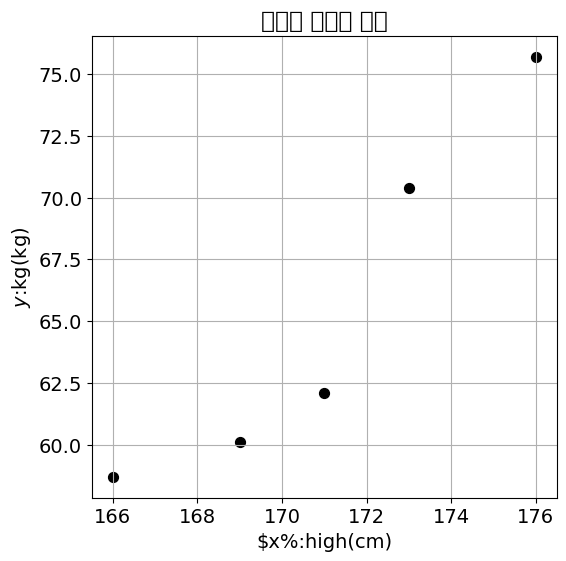

In [9]:
plt.scatter(x,y,c='k',s=50)
plt.xlabel('$x%:high(cm)')
plt.ylabel('$y$:kg(kg)')
plt.title('신장과 체중의 관계')
plt.show()

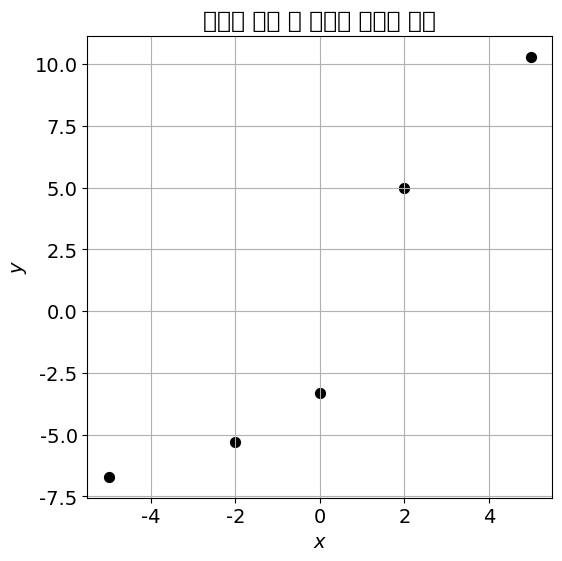

In [10]:
x = x-x.mean()
y = y-y.mean()
plt.scatter(x,y,c='k',s=50)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('데이터 가공 후 신장과 체중의 관계')
plt.show()

예측계산

In [11]:
# 변한한 데이터 x와y를 텐서변수로 변환
x = torch.tensor(x).float()
y = torch.tensor(y).float()
print(x)
print(y)

tensor([-5.,  5.,  0.,  2., -2.])
tensor([-6.7000, 10.3000, -3.3000,  5.0000, -5.3000])


In [12]:
W = torch.tensor(1.0,requires_grad=True).float()
B = torch.tensor(1.0,requires_grad=True).float()

def pred(x):
  return W*x+B
yp=pred(x)
print(yp)

tensor([-4.,  6.,  1.,  3., -1.], grad_fn=<AddBackward0>)


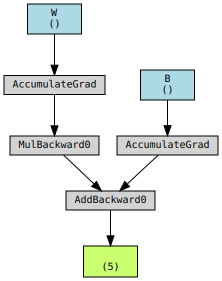

In [13]:
params={'W':W,'B':B}
g = make_dot(yp,params=params)
display(g)

손실계산

In [14]:
#손실함수로는 MSE함수(평균제곱오차)를 사용한다

def mse(yp,p):
  loss=((yp-y)**2).mean()
  return loss
loss = mse(yp,y)
print(loss)

tensor(13.3520, grad_fn=<MeanBackward0>)


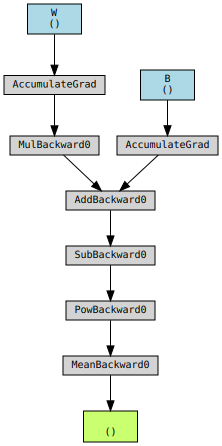

In [15]:
params={'W':W,'B':B}
g = make_dot(loss,params=params)
display(g)

In [16]:
# 손실계산이 끝났다면 backward를 호출하여 경사계산
loss.backward()
print(W.grad)
print(B.grad)

tensor(-19.0400)
tensor(2.0000)


In [17]:
lr=0.001
W-=lr*W.grad
B-=lr*B.grad


RuntimeError: ignored

In [18]:
with torch.no_grad():
  W-=lr*W.grad
  B-=lr*B.grad
  W.grad.zero_()
  B.grad.zero_()

In [19]:
print(W)
print(B)
print(W.grad)
print(B.grad)

tensor(1.0190, requires_grad=True)
tensor(0.9980, requires_grad=True)
tensor(0.)
tensor(0.)


In [23]:
W = torch.tensor(1.0,requires_grad=True).float()
B = torch.tensor(1.0,requires_grad=True).float()
num_epochs = 500
lr = 0.001
history = np. zeros((0,2))

In [25]:
# 루프 처리

for epoch in range(num_epochs):

    # 예측 계산
    Yp = pred(x)

    # 손실 계산
    loss = mse(Yp, y)

    # 경사 계산
    loss.backward()

    with torch.no_grad():
        # 파라미터 수정
        W -= lr * W.grad
        B -= lr * B.grad

        # 경삿값 초기화
        W.grad.zero_()
        B.grad.zero_()

    # 손실 기록
    if (epoch %10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f'epoch = {epoch}  loss = {loss:.4f}')


epoch = 0  loss = 13.3520
epoch = 10  loss = 10.3855
epoch = 20  loss = 8.5173
epoch = 30  loss = 7.3364
epoch = 40  loss = 6.5858
epoch = 50  loss = 6.1047
epoch = 60  loss = 5.7927
epoch = 70  loss = 5.5868
epoch = 80  loss = 5.4476
epoch = 90  loss = 5.3507
epoch = 100  loss = 5.2805
epoch = 110  loss = 5.2275
epoch = 120  loss = 5.1855
epoch = 130  loss = 5.1507
epoch = 140  loss = 5.1208
epoch = 150  loss = 5.0943
epoch = 160  loss = 5.0703
epoch = 170  loss = 5.0480
epoch = 180  loss = 5.0271
epoch = 190  loss = 5.0074
epoch = 200  loss = 4.9887
epoch = 210  loss = 4.9708
epoch = 220  loss = 4.9537
epoch = 230  loss = 4.9373
epoch = 240  loss = 4.9217
epoch = 250  loss = 4.9066
epoch = 260  loss = 4.8922
epoch = 270  loss = 4.8783
epoch = 280  loss = 4.8650
epoch = 290  loss = 4.8522
epoch = 300  loss = 4.8399
epoch = 310  loss = 4.8281
epoch = 320  loss = 4.8167
epoch = 330  loss = 4.8058
epoch = 340  loss = 4.7953
epoch = 350  loss = 4.7853
epoch = 360  loss = 4.7756
epoch = 37

W =  1.820683
B =  0.3675114
초기상태 : 손실:13.3520
최종상태 : 손실:4.6796


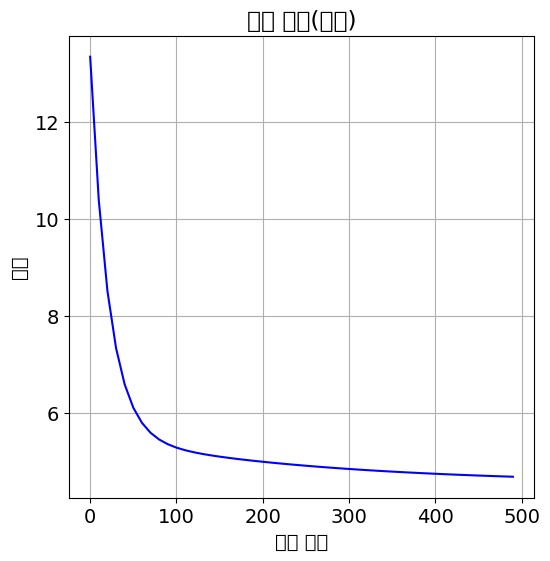

In [27]:
# 최종 파라미터 값
print('W = ', W.data.numpy())
print('B = ', B.data.numpy())

# 손실 확인
print(f'초기상태 : 손실:{history[0,1]:.4f}')
print(f'최종상태 : 손실:{history[-1,1]:.4f}')

plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.title('학습 곡선(손실)')
plt.show()

In [30]:
# x의 범위를 구함(Xrange)
X_max = x.max()
X_min = x.min()
X_range = np.array((X_min, X_max))
X_range = torch.from_numpy(X_range).float()
print(X_range)

# 이와 대응하는 예측값 y를 구함
Y_range = pred(X_range)
print(Y_range.data)

tensor([-5.,  5.])
tensor([-8.7359,  9.4709])


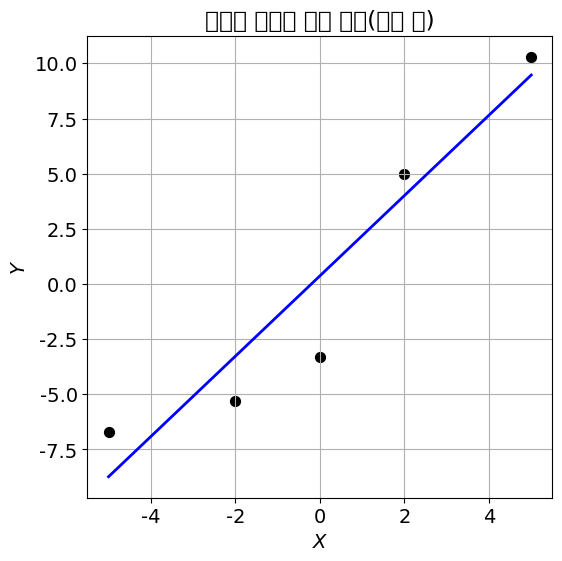

In [31]:
plt.scatter(x,  y,  c='k',  s=50)
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.plot(X_range.data, Y_range.data, lw=2, c='b')
plt.title('신장과 체중의 상관 직선(가공 후)')
plt.show()

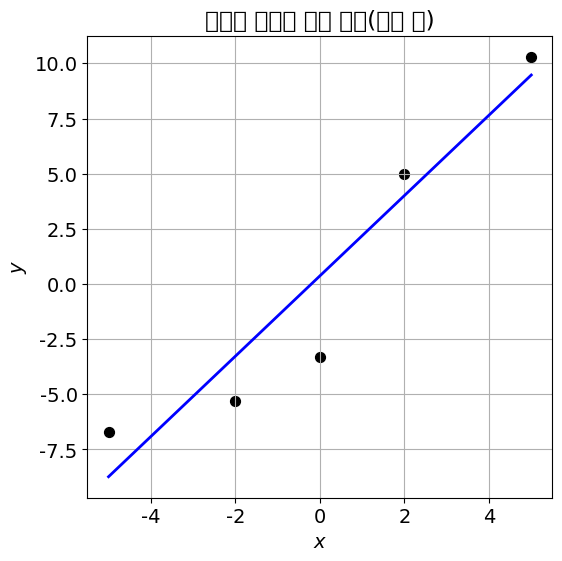

In [32]:
# y좌표와 x좌표 값 계산

x_range = X_range + x.mean()
yp_range = Y_range + y.mean()

# 그래프 출력

plt.scatter(x,  y,  c='k',  s=50)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(x_range, yp_range.data, lw=2, c='b')
plt.title('신장과 체중의 상관 직선(가공 전)')
plt.show()

In [34]:
# 초기화

# W와 B를 변수로 사용
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

# 반복 횟수
num_epochs = 500

# 학습률
lr = 0.001

# optimizer 로 SGD(확률적 경사 하강법)을 사용
import torch.optim as optim
optimizer = optim.SGD([W, B], lr=lr)

# history 기록을 위한 배열 초기화
history = np.zeros((0, 2))

# 루프 처리

for epoch in range(num_epochs):

    # 예측 계산
    Yp = pred(x)

    # 손실 계산
    loss = mse(Yp, y)

    # 경사 계산
    loss.backward()

    # 파라미터 수정
    optimizer.step()

    # 경삿값 초기화
    optimizer.zero_grad()

    # 손실 기록
    if (epoch %10 == 0):
        item = np.array([epoch, loss.item()])
        history = np.vstack((history, item))
        print(f'epoch = {epoch}  loss = {loss:.4f}')

epoch = 0  loss = 13.3520
epoch = 10  loss = 10.3855
epoch = 20  loss = 8.5173
epoch = 30  loss = 7.3364
epoch = 40  loss = 6.5858
epoch = 50  loss = 6.1047
epoch = 60  loss = 5.7927
epoch = 70  loss = 5.5868
epoch = 80  loss = 5.4476
epoch = 90  loss = 5.3507
epoch = 100  loss = 5.2805
epoch = 110  loss = 5.2275
epoch = 120  loss = 5.1855
epoch = 130  loss = 5.1507
epoch = 140  loss = 5.1208
epoch = 150  loss = 5.0943
epoch = 160  loss = 5.0703
epoch = 170  loss = 5.0480
epoch = 180  loss = 5.0271
epoch = 190  loss = 5.0074
epoch = 200  loss = 4.9887
epoch = 210  loss = 4.9708
epoch = 220  loss = 4.9537
epoch = 230  loss = 4.9373
epoch = 240  loss = 4.9217
epoch = 250  loss = 4.9066
epoch = 260  loss = 4.8922
epoch = 270  loss = 4.8783
epoch = 280  loss = 4.8650
epoch = 290  loss = 4.8522
epoch = 300  loss = 4.8399
epoch = 310  loss = 4.8281
epoch = 320  loss = 4.8167
epoch = 330  loss = 4.8058
epoch = 340  loss = 4.7953
epoch = 350  loss = 4.7853
epoch = 360  loss = 4.7756
epoch = 37

W =  1.820683
B =  0.3675114
초기상태 : 손실:13.3520
최종상태 : 손실:4.6796


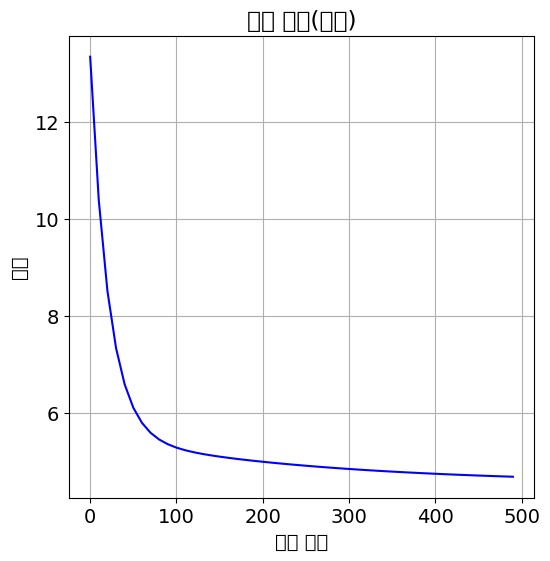

In [35]:
# 최종 파라미터 값
print('W = ', W.data.numpy())
print('B = ', B.data.numpy())

# 손실 확인
print(f'초기상태 : 손실:{history[0,1]:.4f}')
print(f'최종상태 : 손실:{history[-1,1]:.4f}')
# 학습 곡선 출력(손실)

plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.title('학습 곡선(손실)')
plt.show()

In [39]:
# 초기화

# W와 B를 변수로 사용
W = torch.tensor(1.0, requires_grad=True).float()
B = torch.tensor(1.0, requires_grad=True).float()

# 반복 횟수
num_epochs = 500

# 학습률
lr = 0.001

# optimizer로 SGD(확률적 경사 하강법)을 사용
import torch.optim as optim
optimizer = optim.SGD([W, B], lr=lr, momentum=0.9)

# history 기록을 위한 배열 초기화
history2 = np.zeros((0, 2))


# 루프 처리

for epoch in range(num_epochs):

    # 예측 계산
    Yp = pred(x)

    # 손실 계산
    loss = mse(Yp, y)

    # 경사 계산
    loss.backward()

    # 파라미터 수정
    optimizer.step()

    # 경삿값 초기화
    optimizer.zero_grad()

    # 손실 기록
    if (epoch %10 == 0):
        item = np.array([epoch, loss.item()])
        history2 = np.vstack((history2, item))

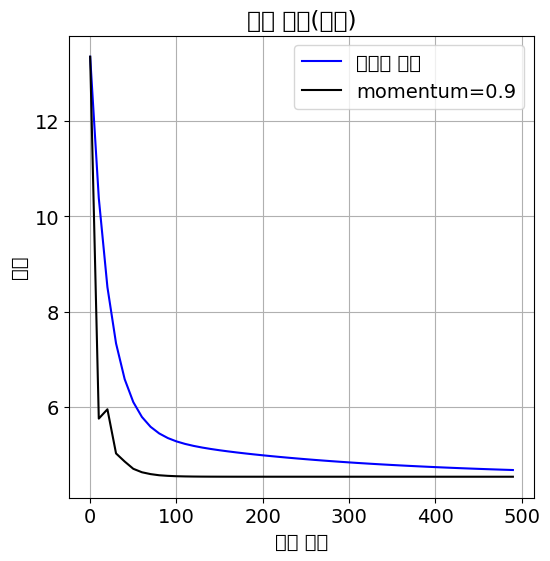

In [40]:
# 학습 곡선(손실) 출력

plt.plot(history[:,0], history[:,1], 'b', label='기본값 설정')
plt.plot(history2[:,0], history2[:,1], 'k', label='momentum=0.9')
plt.xlabel('반복 횟수')
plt.ylabel('손실')
plt.legend()
plt.title('학습 곡선(손실)')
plt.show()

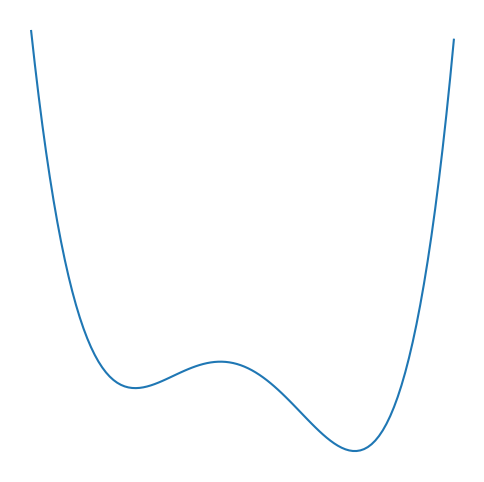

In [46]:
def f(x):
    return x * (x+1) * (x+2) * (x-2)

x = np.arange(-3, 2.7, 0.05)
y = f(x)

plt.plot(x, y)
plt.axis('off')
plt.show()